* Machine Learning Training Data : size stratification
* Data originally pooled from all technologies

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [189]:
# Import Training Data
df_20to49 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train_.csv')
df_50to99 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train_.csv')
df_100to299 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train_.csv')
df_300to399 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train_.csv')
df_400to499 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train_.csv')
df_500to999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train_.csv')
df_1000to5999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train_.csv')
df_6000 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train_.csv')

In [190]:
# Copy Dataframes for later parsing tasks
df_20to49_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train.csv')
df_50to99_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train.csv')
df_100to299_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train.csv')
df_300to399_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train.csv')
df_400to499_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train.csv')
df_500to999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train.csv')
df_1000to5999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train.csv')
df_6000_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train.csv')

In [191]:
df_20to49['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

<a id='imbalance'></a>

<a id='hom_ref'></a>

In [192]:
# Import Test Data
df_20to49_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test_.csv')
df_50to99_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test_.csv')
df_100to299_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test_.csv')
df_300to399_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test_.csv')
df_400to499_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test_.csv')
df_500to999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test_.csv')
df_1000to5999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test_.csv')
df_6000_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test_.csv')

In [193]:
# Import Test Data
df_20to49_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test.csv')
df_50to99_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test.csv')
df_100to299_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test.csv')
df_300to399_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test.csv')
df_400to499_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test.csv')
df_500to999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test.csv')
df_1000to5999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test.csv')
df_6000_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test.csv')

In [194]:
df_20to49_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [195]:
df_20to49_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [9]:
# # Store header names in lists and find names that are NOT contained in BOTH lists
# c = list(df_train.columns.values)
# d = list(df_test.columns.values)
# set(d) - set(c)

***
EDA

Size distribution of sampled data set [all size datasets pooled]
***

In [10]:
# df_train = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
# df_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [11]:
# df_train['Size'].abs()
# df_test['Size'].abs()
# df_test = df_test[df_test['Size'] >= 20]

# df_train['log_size'] = np.log10(df_train.Size)
# df_test['log_size'] = np.log10(df_test.Size)

In [12]:
# sns.set_style("white")
# p = df_train['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Training Set')
# # plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_training.png', bbox_inches='tight') 

In [13]:
# sns.set_style("white")
# p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Test Set')
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_test.png', bbox_inches='tight') 

***
**50-99bp**
***

***
Impute missing values using KNN
***

In [14]:
# Store training data in a new variable which will be converted to a matrix
X = df_50to99
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,927.777778,30.932822,18.0,447.388889,67.991943,18.0,0.0,0.0,888.397351,...,10398.42857,4556.242276,28.0,0,0,0,0.0,145236012,1,0.529412
1,1,919.000000,34.000000,2.0,362.500000,80.500000,2.0,0.0,0.0,835.198473,...,12812.52941,2341.473044,17.0,0,0,0,0.0,122431878,1,1.000000
2,1,976.916667,13.377790,36.0,427.805556,65.266045,36.0,0.0,0.0,879.230769,...,9981.00000,4764.358509,25.0,0,0,0,0.0,139942337,1,1.000000


In [15]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/422 with 2 missing, elapsed time: 0.156
Imputing row 101/422 with 2 missing, elapsed time: 0.229
Imputing row 201/422 with 2 missing, elapsed time: 0.243
Imputing row 301/422 with 2 missing, elapsed time: 0.252
Imputing row 401/422 with 2 missing, elapsed time: 0.259


In [16]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
df_50to99_header = list(df_50to99.columns.values)
X.columns = df_50to99_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1.0,927.777778,30.932822,18.0,447.388889,67.991943,18.0,0.0,0.0,888.397351,...,10398.42857,4556.242276,28.0,0.0,0.0,0.0,0.0,145236012.0,1.0,0.529412
1,1.0,919.000000,34.000000,2.0,362.500000,80.500000,2.0,0.0,0.0,835.198473,...,12812.52941,2341.473044,17.0,0.0,0.0,0.0,0.0,122431878.0,1.0,1.000000
2,1.0,976.916667,13.377790,36.0,427.805556,65.266045,36.0,0.0,0.0,879.230769,...,9981.00000,4764.358509,25.0,0.0,0.0,0.0,0.0,139942337.0,1.0,1.000000


In [17]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [18]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

1.0    211
0.0    153
2.0     58
dtype: int64

In [19]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [20]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [21]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [22]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced') 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

**NOTE :** 

Determined OOB score based on 70% of the training data

In [23]:
n_estimators = 50
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



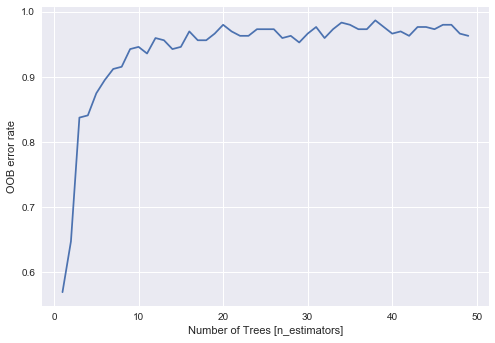

In [24]:
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob

ax = plt.plot(trees, oob)
sns.set_style("white")
plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50-99bp_OOB.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [25]:
model = RandomForestClassifier(n_estimators=18, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=18, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

In [26]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

<a id='100_trees'></a>

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



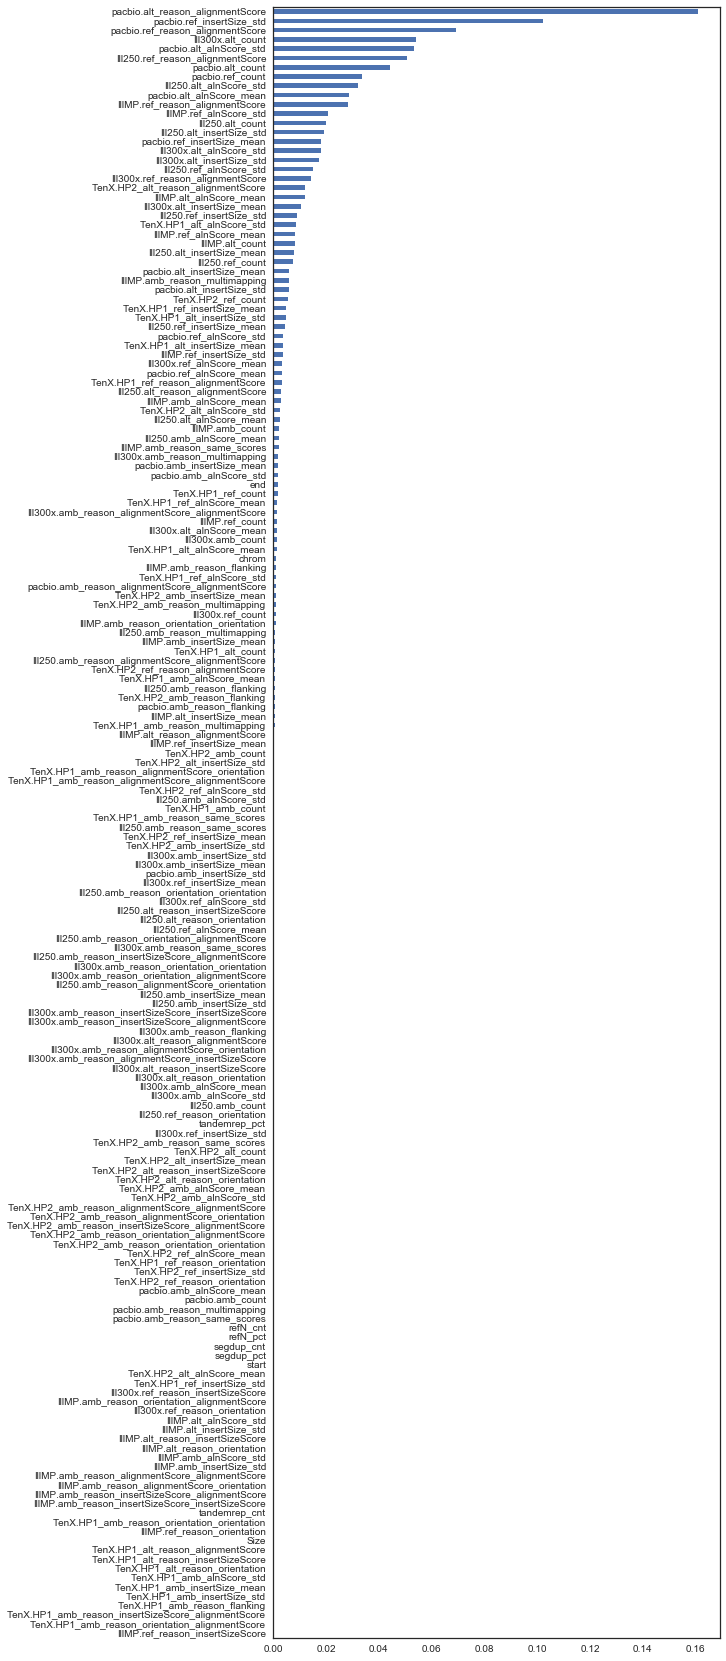

In [27]:
# # %matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/df_50to99_featureImportance.png', bbox_inches='tight')
plt.show()

In [28]:
# feature_importances.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_feature_importance.csv')

In [29]:
X_ = X4[['pacbio.alt_reason_alignmentScore','pacbio.ref_alnScore_std','pacbio.ref_insertSize_std','Ill250.ref_reason_alignmentScore','pacbio.alt_insertSize_std','pacbio.ref_reason_alignmentScore','Ill300x.alt_count','pacbio.ref_count','pacbio.alt_alnScore_mean','pacbio.alt_count','Ill250.alt_reason_alignmentScore','Ill300x.ref_reason_alignmentScore','pacbio.ref_insertSize_mean','pacbio.ref_alnScore_mean','Ill250.alt_alnScore_std','IllMP.ref_count','IllMP.alt_reason_alignmentScore','Ill250.alt_insertSize_mean','TenX.HP1_alt_alnScore_std','TenX.HP2_alt_count','Ill250.alt_count','IllMP.alt_count','Ill250.ref_insertSize_std','IllMP.alt_alnScore_std','Ill300x.ref_count']]

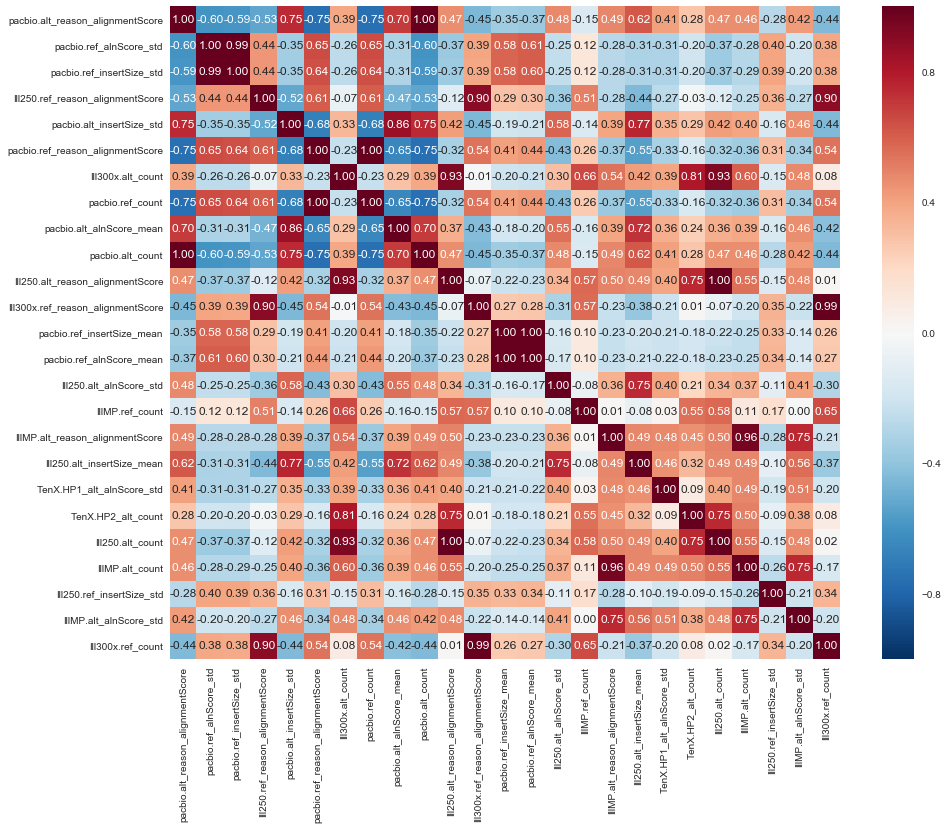

In [30]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
# plt.figure(figsize=(18, 18))
plt.show()
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/df_50to99_heatmap.png', bbox_inches='tight')

In [31]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

0.0    106
1.0    155
2.0     34
dtype: int64

<a id='prediction_step'></a>

In [32]:
pred = model.predict(X_test)

<a id='traintest_precision'></a>

In [33]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 

Precision score of the training subset: 0.945


In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Accuracy score of the training subset: 0.945


In [35]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
151,928.875,30.823844,16.0,424.250,68.197782,16.0,0.0,0.0,871.511521,154.841531,...,9806.15000,3766.288628,20.0,0.0,0.0,1.0,1.0,81785669.0,1.0,1.0
354,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,863.604061,129.980106,...,10298.41667,3730.255282,36.0,0.0,0.0,0.0,0.0,25110907.0,0.0,0.0
175,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,844.726368,147.157139,...,9129.25641,4319.177003,39.0,0.0,0.0,0.0,0.0,190463055.0,0.0,0.0
65,0.000,0.000000,0.0,0.000,0.000000,0.0,0.0,0.0,887.968504,165.852175,...,10882.42373,3811.122003,59.0,0.0,0.0,0.0,0.0,87158309.0,0.0,0.0
322,957.750,16.199923,8.0,417.125,66.015978,8.0,0.0,0.0,890.989796,110.233657,...,10445.25000,4054.307993,36.0,0.0,0.0,0.0,0.0,52208313.0,1.0,1.0


In [36]:
labels = pd.DataFrame(y_test)

In [37]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_50to99['GTcons']
df_Xtest['chrom'] = df_50to99['chrom']
df_Xtest['start'] = df_50to99['start']
df_Xtest['end'] = df_50to99['end']

In [38]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [39]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Reference    47
Homozygous_Variant      24
Heterozygous_Variant    56
dtype: int64

In [40]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Reference    42
Homozygous_Variant      22
Heterozygous_Variant    63
dtype: int64

In [41]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[56  0  0]
 [ 5 42  0]
 [ 2  0 22]]


In [42]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,56,0,0,56
Homozygous_Reference,5,42,0,47
Homozygous_Variant,2,0,22,24
All,63,42,22,127


<a id='traintest_confusion_matrix'></a>

In [43]:
# # Pandas: save table to HTML
# p = pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)
# p.to_html('cro.html')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.89      1.00      0.94        56
Homozygous_Reference       1.00      0.89      0.94        47
  Homozygous_Variant       1.00      0.92      0.96        24

         avg / total       0.95      0.94      0.95       127



***
Predict
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

In [ ]:
df_50to99_test.drop(['GTcons'],axis=1, inplace=True)

In [ ]:
X2 = df_50to99_test

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_50to99_test_header = list(df_50to99_test.columns.values)
X2.columns = df_50to99_test_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_50to99_test_['chrom']
X5['GTcons'] = df_50to99_test_['GTcons']
X5['start'] = df_50to99_test_['start']
X5['end'] = df_50to99_test_['end']
X5['Size'] = df_50to99_test_['Size']
X5['GTsupp'] = df_50to99_test_['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/df_50to99.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/50to99/df_50to99_log.csv', index=False)

In [45]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/df_50to99.csv')

In [46]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/df_50to99_final.csv', index=False)

In [ ]:
# X6['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
# X6['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
# X6['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X7['GTcons'].isnull().sum()

***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [47]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[150   6   0]
 [  2 237   0]
 [  1   3  70]]


In [48]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [49]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.974


In [50]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.974


In [51]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,237,2,0,239
Homozygous_Reference,6,150,0,156
Homozygous_Variant,3,1,70,74
All,246,153,70,469


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [52]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [53]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,164,0,0,164
Homozygous_Reference,0,113,0,113
Homozygous_Variant,0,0,29,29
All,164,113,29,306


In [54]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00       164
Homozygous_Reference       1.00      1.00      1.00       113
  Homozygous_Variant       1.00      1.00      1.00        29

         avg / total       1.00      1.00      1.00       306



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000 - 5999 bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 1000 - 6000+

In [55]:
df = pd.concat([df_1000to5999, df_1000to5999_test, df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = df
df_ = pd.concat([df_1000to5999_, df_1000to5999_test_, df_6000_, df_6000_test_], axis=0)
df_ = df_.reset_index()

In [56]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df_.drop(['index'],axis=1, inplace=True)

In [57]:
X2 = df

** Impute missing values using KNN **

In [58]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/284 with 1 missing, elapsed time: 0.069
Imputing row 101/284 with 1 missing, elapsed time: 0.082
Imputing row 201/284 with 57 missing, elapsed time: 0.088


In [59]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [60]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [61]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [62]:
pred = model.predict(X5)

In [63]:
pred_prob = model.predict_proba(X5)

In [64]:
pred_prob_log = model.predict_log_proba(X5)

In [65]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [66]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [67]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [68]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_log._predLrgcsv', index=False)

In [72]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_predLrg.csv')

In [73]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [74]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [75]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.944444,0.055556,0.000000,0,5,0.000000,0.000000,0.0,0.000000,0.000000,...,5291.525830,69.0,0,0,0,0,0.0,66398770,6,0.097264
1,0.000000,0.166667,0.833333,2,3,972.727273,15.764407,44.0,446.931818,81.055368,...,0.000000,0.0,2,0,0,0,0.0,14189915,3,0.037082
2,0.111111,0.777778,0.111111,1,5,977.161290,15.238103,31.0,422.161290,57.943853,...,3615.789459,24.0,1,0,0,0,0.0,20950622,10,0.076469


In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [76]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [77]:
X6.GTcons = X6.GTcons.astype(int)

In [78]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    120
1    100
2     64
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [79]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[118   2   0]
 [  2  98   0]
 [  0   3  61]]


In [80]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [81]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.975


In [82]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.975


In [83]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,98,2,0,100
Homozygous_Reference,2,118,0,120
Homozygous_Variant,3,0,61,64
All,103,120,61,284


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [84]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [85]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Homozygous_Reference,Homozygous_Variant,All
True,,,
Homozygous_Reference,113,0,113
Homozygous_Variant,0,8,8
All,113,8,121


In [86]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Homozygous_Reference       1.00      1.00      1.00       113
  Homozygous_Variant       1.00      1.00      1.00         8

         avg / total       1.00      1.00      1.00       121



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000 - 5999 bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 1000 - 5999

In [89]:
df = pd.concat([df_1000to5999, df_1000to5999_test], axis=0)
df = df.reset_index()
df2 = df

In [90]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)

In [91]:
X2 = df

** Impute missing values using KNN **

In [92]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/227 with 1 missing, elapsed time: 0.047
Imputing row 101/227 with 1 missing, elapsed time: 0.061
Imputing row 201/227 with 57 missing, elapsed time: 0.067


In [93]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [94]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [95]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [96]:
pred = model.predict(X5)

In [97]:
pred_prob = model.predict_proba(X5)

In [98]:
pred_prob_log = model.predict_log_proba(X5)

In [99]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [100]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [101]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [102]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [103]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_1000to5999_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_log_1000to5999_.csv', index=False)

In [104]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_1000to5999_predLrg.csv')

In [105]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [106]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [107]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_final_1000to5999_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [108]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [109]:
X6.GTcons = X6.GTcons.astype(int)

In [110]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    93
1    80
2    54
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [111]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[91  2  0]
 [ 0 80  0]
 [ 0  3 51]]


In [112]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [113]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.978


In [114]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.978


In [115]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,80,0,0,80
Homozygous_Reference,2,91,0,93
Homozygous_Variant,3,0,51,54
All,85,91,51,227


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [116]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [117]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,12,0,0,12
Homozygous_Reference,0,78,0,78
Homozygous_Variant,0,0,3,3
All,12,78,3,93


In [118]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        12
Homozygous_Reference       1.00      1.00      1.00        78
  Homozygous_Variant       1.00      1.00      1.00         3

         avg / total       1.00      1.00      1.00        93



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 6000+ bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 6000+

In [196]:
df = pd.concat([df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_6000, df_6000_test], axis=0)
df2 = df2.reset_index()

In [197]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [198]:
X2 = df

** Impute missing values using KNN **

In [199]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/57 with 2 missing, elapsed time: 0.005


In [200]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,938.807692,17.007960,52.0,478.903846,84.485834,45.0,7.0,0.0,897.581731,141.008841,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,151456429.0,9.0,0.031567
1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,1.0,0.0,882.136546,141.793126,...,9140.708333,4370.268586,72.000000,0.0,0.0,0.0,0.000000,146862618.0,33.0,0.055111
2,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,134.444514,...,9168.799423,4232.174053,109.449801,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979


In [201]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,938.807692,17.007960,52.0,478.903846,84.485834,45.0,7.0,0.0,897.581731,141.008841,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,151456429.0,9.0,0.031567
1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,1.0,0.0,882.136546,141.793126,...,9140.708333,4370.268586,72.000000,0.0,0.0,0.0,0.000000,146862618.0,33.0,0.055111
2,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,134.444514,...,9168.799423,4232.174053,109.449801,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979


In [202]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [203]:
pred = model.predict(X5)

In [204]:
pred_prob = model.predict_proba(X5)

In [205]:
pred_prob_log = model.predict_log_proba(X5)

In [206]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [207]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [208]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [209]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [210]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_6000_predLrg.csv', index=False)

In [138]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_log_6000_.csv', index=False)

In [211]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_6000_predLrg.csv')

In [212]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [213]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [214]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.111111,0.888889,0,5,938.807692,17.007960,52.0,478.903846,84.485834,...,0.000000,0.000000,2,0,0,0,0.000000,66398770,9,0.031567
1,0.222222,0.777778,0.000000,2,3,967.517241,14.852425,29.0,430.965517,70.471556,...,4370.268586,72.000000,1,0,0,0,0.000000,14189915,33,0.055111
2,0.722222,0.277778,0.000000,1,5,977.700000,17.343875,20.0,451.850000,87.001882,...,4232.174053,109.449801,0,0,0,4,0.076523,20950622,110,0.059979


In [215]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/50to99/50to99_final_6000_predLrg.csv', index=False)

In [216]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [217]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [218]:
X6.GTcons = X6.GTcons.astype(int)

In [219]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    23
1    21
2    13
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [220]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[14  4  5]
 [ 9  8  4]
 [ 6  6  1]]


In [221]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [222]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.404


In [223]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.404


In [224]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,8,9,4,21
Homozygous_Reference,4,14,5,23
Homozygous_Variant,6,6,1,13
All,18,29,10,57


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [225]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [226]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Homozygous_Reference,All
True,,
Heterozygous_Variant,8,8
Homozygous_Reference,12,12
Homozygous_Variant,6,6
All,26,26


In [227]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.00      0.00      0.00         8
Homozygous_Reference       0.46      1.00      0.63        12
  Homozygous_Variant       0.00      0.00      0.00         6

         avg / total       0.21      0.46      0.29        26



/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/metrics/classification.py:1139: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

